# Yahoo Finance API & yfinance Library

In [8]:
!pip install yahoo_fin

In [1]:
!pip install yfinance

In [14]:
import yahoo_fin.stock_info as si # one of two modules of yahoo_fin
import yfinance as yf
import pandas as pd
import seaborn as sns

In [ ]:
amazon_weekly = si.get_data("amzn", start_date="12/04/2020", end_date="12/04/2021", index_as_date = True, interval = "1wk")
amazon_weekly

In [163]:
# historical data of Apple Inc.
aapl_df = si.get_data('aapl', start_date = '01-01-2015', end_date = '31-12-2015')

In [162]:
# current/real stock price data
si.get_live_price('aapl')

147.80999755859375

In [160]:
si.get_analysts_info('aapl')

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Dec 2022)  Next Qtr. (Mar 2023)  \
 0   No. of Analysts                    27.00                 26.00   
 1     Avg. Estimate                     2.01                  1.49   
 2      Low Estimate                     1.86                  1.32   
 3     High Estimate                     2.12                  1.67   
 4      Year Ago EPS                     2.10                  1.52   
 
    Current Year (2023)  Next Year (2024)  
 0                38.00             32.00  
 1                 6.25              6.81  
 2                 5.40              6.01  
 3                 6.87              7.36  
 4                 6.11              6.25  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Dec 2022) Next Qtr. (Mar 2023)  \
 0          No. of Analysts                      23                   23   
 1            Avg. Estimate                 124.17B               98.27B   
 2             Low Estimate           

In [ ]:
si.get_data(ticker = 'aapl', index_as_date = False) # historical data of Apple Inc.

In [3]:
dow_ticker_list = si.tickers_dow()
sp500_ticker_list = si.tickers_sp500()
nasdaq_ticker_list = si.tickers_nasdaq()

In [ ]:
dow_stats = {}
for ticker in dow_ticker_list:
    temp = si.get_stats_valuation(ticker)
    temp = temp.iloc[:,:2]
    temp.columns = ["Attribute", "Recent"]
    dow_stats[ticker] = temp
dow_stats

In [ ]:
combined_stats = pd.concat(dow_stats)
combined_stats = combined_stats.reset_index()

del combined_stats["level_1"]
# update column names
combined_stats.columns = ["Ticker", "Attribute", "Recent"]
combined_stats


In [ ]:
# comparing by particular attribute
pe_ratios = combined_stats[combined_stats["Attribute"]=="Trailing P/E"].reset_index()
pe_ratios

In [ ]:
pe_ratios_sorted = pe_ratios.sort_values('Recent',ascending=False)
pe_ratios_sorted

In [4]:
dow_ticker_list

['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

In [11]:
combined_list = dow_ticker_list + sp500_ticker_list + nasdaq_ticker_list

In [13]:
import csv

with open('ticker.txt', 'w') as file:
    
    for ticker in combined_list:
        file.write(ticker + '\n')

In [3]:
overview_list = []

for ticker in dow_ticker_list:
    industry =  yf.Ticker(ticker).info['industry']
    pe_ratio = si.get_quote_table(ticker)['PE Ratio (TTM)']
    overview_list.append((ticker, industry, pe_ratio))

In [4]:
overview_list

[('AAPL', 'Consumer Electronics', 23.07),
 ('AMGN', 'Drug Manufacturers—General', 22.93),
 ('AXP', 'Credit Services', 15.52),
 ('BA', 'Aerospace & Defense', nan),
 ('CAT', 'Farm & Heavy Construction Machinery', 16.67),
 ('CRM', 'Software—Application', 501.85),
 ('CSCO', 'Communication Equipment', 17.39),
 ('CVX', 'Oil & Gas Integrated', 9.81),
 ('DIS', 'Entertainment', 52.66),
 ('DOW', 'Chemicals', 6.58),
 ('GS', 'Capital Markets', 9.58),
 ('HD', 'Home Improvement Retail', 19.3),
 ('HON', 'Conglomerates', 27.33),
 ('IBM', 'Information Technology Services', 24.19),
 ('INTC', 'Semiconductors', 8.77),
 ('JNJ', 'Drug Manufacturers—General', 24.68),
 ('JPM', 'Banks—Diversified', 11.1),
 ('KO', 'Beverages—Non-Alcoholic', 27.87),
 ('MCD', 'Restaurants', 34.09),
 ('MMM', 'Conglomerates', 11.03),
 ('MRK', 'Drug Manufacturers—General', 18.26),
 ('MSFT', 'Software—Infrastructure', 26.3),
 ('NKE', 'Footwear & Accessories', 30.78),
 ('PG', 'Household & Personal Products', 26.04),
 ('TRV', 'Insuranc

In [11]:
si.get_quote_table('AAPL')

{'1y Target Est': 176.45,
 '52 Week Range': '125.87 - 182.94',
 'Ask': '0.00 x 1200',
 'Avg. Volume': 84510440.0,
 'Beta (5Y Monthly)': 1.22,
 'Bid': '0.00 x 1200',
 "Day's Range": '125.87 - 131.03',
 'EPS (TTM)': 6.11,
 'Earnings Date': 'Jan 25, 2023 - Jan 30, 2023',
 'Ex-Dividend Date': 'Nov 04, 2022',
 'Forward Dividend & Yield': '0.92 (0.70%)',
 'Market Cap': '2.005T',
 'Open': 129.67,
 'PE Ratio (TTM)': 20.63,
 'Previous Close': 130.03,
 'Quote Price': 126.04000091552734,
 'Volume': 85438391.0}

In [12]:
yf.Ticker('aapl').info #dictionary now only contains a limited amount of information 

{'regularMarketPrice': None,
 'preMarketPrice': None,
 'logo_url': '',
 'trailingPegRatio': 2.5348}

In [5]:
for ticker in sp500_ticker_list:
    industry =  yf.Ticker(ticker).info['industry']
    pe_ratio = si.get_quote_table(ticker)['PE Ratio (TTM)']
    overview_list.append((ticker, industry, pe_ratio))

KeyError: 'industry'

In [34]:
len(overview_list)

229

In [6]:
len(overview_list)

229

In [19]:
from threading import Thread
import threading
import numpy as np
import time

industry_list = []

def assign_ticker(t, industry_list):
    industry = yf.Ticker(t).info['industry'] 
    pe_ratio = si.get_quote_table(t)['PE Ratio (TTM)']
    industry_list.append((t, industry, pe_ratio))
 
for ticker in dow_ticker_list:
    Thread(target = assign_ticker, args = (ticker, industry_list)).start()
    print(ticker)
    time.sleep(5)    

8
AAPL
AMGN
AXP
BA
CAT
CRM
CSCO
CVX
DIS
DOW
GS
HD
HON
IBM
INTC
JNJ
JPM
KO
MCD
MMM
MRK
MSFT
error:NKE
'NoneType' object is not subscriptable
NKE
PG
error:TRV
{'chart': {'result': None, 'error': {'code': 'Internal Server Error', 'description': 'Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=PG, cluster=finance]]'}}}
TRV
UNH
error:V
{'chart': {'result': None, 'error': {'code': 'Internal Server Error', 'description': 'Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=TRV, cluster=finance]]'}}}
V
error:VZ
No tables found
VZ
error:WBA
{'chart': {'result': None, 'error': {'code': 'Internal Server Error', 'description': 'Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=VZ, cluster=finance]]'}}}
WBA
WMT
error:WMT
{'chart': {'result': None, 'error': {'code': 'Internal Server Error', 'description': 'Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=WBA, cluster=finance]]'}}}


In [ ]:
for ticker in sp500_ticker_list:
    try:
        Thread(target = assign_ticker, args = (ticker, industry_list)).start()
        print(str(ticker))
    except KeyError:
        continue       

In [8]:
overview_df = pd.DataFrame.from_records(overview_list, columns = ['ticker','industry', 'PE Ratio'] )
overview_df

,ticker,industry,PE Ratio
0,AAPL,Consumer Electronics,23.07
1,AMGN,Drug Manufacturers—General,22.93
2,AXP,Credit Services,15.52
3,BA,Aerospace & Defense,NaN
4,CAT,Farm & Heavy Construction Machinery,16.67
...,...,...,...
224,FRT,REIT—Retail,66.17
225,FTNT,Software—Infrastructure,17.46
226,FTV,Scientific & Technical Instruments,14.18
227,GD,Aerospace & Defense,21.13


In [38]:
import numpy as np

industry_df = overview_df.groupby(by = ["industry"]).agg(
    avg_industry = ("PE Ratio", np.mean)
)
industry_df

,avg_industry
industry,
Aerospace & Defense,21.130000
Agricultural Inputs,42.543333
Airlines,NaN
Asset Management,16.546667
Auto & Truck Dealerships,21.380000
...,...
Utilities—Diversified,NaN
Utilities—Regulated Electric,24.444167
Utilities—Regulated Gas,22.810000


In [39]:
industry_df.sort_values(by = ["avg_industry"], inplace=True, ascending=False)
industry_df

,avg_industry
industry,
Travel Services,1358.030000
Solar,471.100000
Oil & Gas Equipment & Services,154.890000
Software—Application,143.542000
REIT—Specialty,83.795000
...,...
Insurance—Diversified,7.693333
Airlines,NaN
Resorts & Casinos,NaN


In [40]:
software_industry_df = overview_df[overview_df['industry'] == 'Software—Application']
software_industry_df

,ticker,industry,PE Ratio
5,CRM,Software—Application,501.85
44,ADSK,Software—Application,68.56
67,ANSS,Software—Application,48.88
115,CDAY,Software—Application,NaN
116,CDNS,Software—Application,68.63
145,CRM,Software—Application,29.79


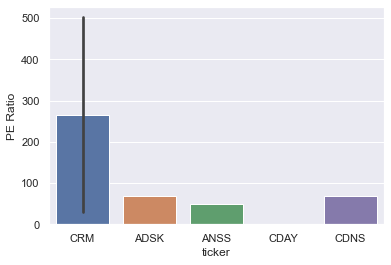

In [41]:
sns.set()
ax = sns.barplot(x = 'ticker', y = 'PE Ratio', data = software_industry_df );